In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("C:/Users/SHUBHAM/Desktop/data/sensor/sensordata.csv")
data.shape

(168697, 6)

In [3]:
data.head()

,Timestamp,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Label
0,21-02-2020 12:35,2.79,2.78,1159.0,9.0,High Speed Normal
1,21-02-2020 12:35,2.84,2.78,1159.0,9.0,High Speed Normal
2,21-02-2020 12:35,2.82,2.80,1159.0,9.0,High Speed Normal
3,21-02-2020 12:35,2.81,2.80,1159.0,9.0,High Speed Normal
4,21-02-2020 12:35,2.82,2.76,1159.0,9.0,High Speed Normal


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168697 entries, 0 to 168696
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Timestamp  168697 non-null  object 
 1   Sensor 1   168697 non-null  float64
 2   Sensor 2   168697 non-null  float64
 3   Sensor 3   168697 non-null  float64
 4   Sensor 4   168697 non-null  float64
 5   Label      168697 non-null  object 
dtypes: float64(4), object(2)
memory usage: 7.7+ MB


In [5]:
data["Label"].value_counts()

High Speed Normal              102696
Medium Speed Normal             65833
Low Speed High Vibration          126
Low Speed Normal                   31
Medium Speed High Vibration         5
High Speed High Current             4
High Speed High Vibration           2
Name: Label, dtype: int64

In [6]:
data.describe()

,Sensor 1,Sensor 2,Sensor 3,Sensor 4
count,168697.000000,168697.000000,168697.000000,168697.000000
mean,2.340096,2.348681,1168.297024,8.553074
std,0.614607,0.596306,36.957278,1.234726
min,1.470000,1.130000,605.000000,0.000000
25%,1.560000,1.610000,1148.000000,7.000000
50%,2.770000,2.780000,1159.000000,9.000000
75%,2.820000,2.820000,1209.000000,10.000000
max,8.820000,3.790000,1261.000000,13.000000


In [7]:
columns=[col for col in data.columns if not col.find('Sensor') ]
columns

['Sensor 1', 'Sensor 2', 'Sensor 3', 'Sensor 4']

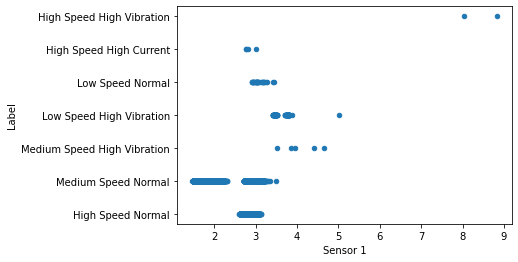

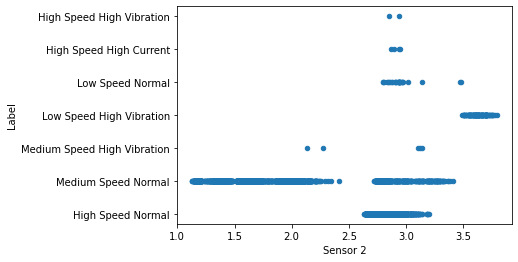

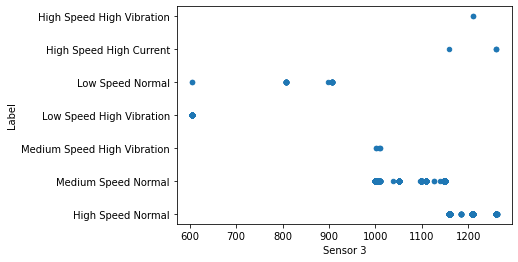

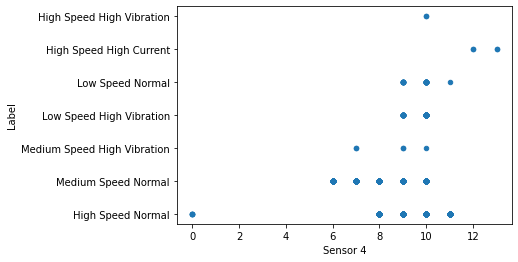

In [8]:
for col in columns:
    data.plot.scatter(x=col,y='Label')

In [9]:
corr=data.corr()
corr

,Sensor 1,Sensor 2,Sensor 3,Sensor 4
Sensor 1,1.000000,0.992006,0.424558,0.918957
Sensor 2,0.992006,1.000000,0.460436,0.921139
Sensor 3,0.424558,0.460436,1.000000,0.480065
Sensor 4,0.918957,0.921139,0.480065,1.000000


In [10]:
classes=data['Label'].unique()
classes
print(data)

               Timestamp  Sensor 1  Sensor 2  Sensor 3  Sensor 4  \
0       21-02-2020 12:35      2.79      2.78    1159.0       9.0   
1       21-02-2020 12:35      2.84      2.78    1159.0       9.0   
2       21-02-2020 12:35      2.82      2.80    1159.0       9.0   
3       21-02-2020 12:35      2.81      2.80    1159.0       9.0   
4       21-02-2020 12:35      2.82      2.76    1159.0       9.0   
...                  ...       ...       ...       ...       ...   
168692  24-06-2020 08:30      2.06      1.18    1000.0       8.0   
168693  24-06-2020 08:30      2.07      1.15    1001.0       8.0   
168694  24-06-2020 08:30      2.06      1.18    1001.0       8.0   
168695  24-06-2020 08:30      2.07      1.17    1001.0       8.0   
168696  24-06-2020 08:30      2.06      1.18    1001.0       8.0   

                      Label  
0         High Speed Normal  
1         High Speed Normal  
2         High Speed Normal  
3         High Speed Normal  
4         High Speed Normal  
...

In [11]:
data=data.drop(['Timestamp'], axis=1)

In [12]:
h_s_n=data[data.Label=='High Speed Normal']
m_s_n=data[data.Label=='Medium Speed Normal']
m_s_h_v=data[data.Label=='Medium Speed High Vibration']
l_s_h_v=data[data.Label=='Low Speed High Vibration']
l_s_n=data[data.Label=='Low Speed Normal']
h_s_h_c=data[data.Label=='High Speed High Current']
h_s_h_v=data[data.Label=='High Speed High Vibration']


# Kmean Clustering


In [13]:
kmeandata=data.drop(['Label'], axis=1)
print(kmeandata)
from sklearn.preprocessing import StandardScaler
std_data=StandardScaler().fit_transform(kmeandata)
kmeandata=pd.DataFrame(std_data, columns=columns)
from sklearn.decomposition import PCA
from sklearn import decomposition
pcaa = PCA(n_components=2)
X = pcaa.fit_transform(kmeandata)
print(pcaa.explained_variance_ratio_)
print(X)

        Sensor 1  Sensor 2  Sensor 3  Sensor 4
0           2.79      2.78    1159.0       9.0
1           2.84      2.78    1159.0       9.0
2           2.82      2.80    1159.0       9.0
3           2.81      2.80    1159.0       9.0
4           2.82      2.76    1159.0       9.0
...          ...       ...       ...       ...
168692      2.06      1.18    1000.0       8.0
168693      2.07      1.15    1001.0       8.0
168694      2.06      1.18    1001.0       8.0
168695      2.07      1.17    1001.0       8.0
168696      2.06      1.18    1001.0       8.0

[168697 rows x 4 columns]
[0.79349494 0.17942786]
[[ 0.90274319  0.61192656]
 [ 0.94695975  0.63196488]
 [ 0.94764448  0.63063565]
 ...
 [-3.10429783  3.6781379 ]
 [-3.10464019  3.67880252]
 [-3.10429783  3.6781379 ]]


kmeandata=data.drop(['Label'], axis=1)
from sklearn.preprocessing import StandardScaler
std_data=StandardScaler().fit_transform(kmeandata)
kmeandata=pd.DataFrame(std_data, columns=columns)
from sklearn.decomposition import PCA
from sklearn import decomposition
pcaa = PCA(n_components=2)
X = pcaa.fit_transform(kmeandata)
print(pcaa.explained_variance_ratio_)
print(X)

In [14]:
print(data)
print(data.describe())
print(kmeandata)

        Sensor 1  Sensor 2  Sensor 3  Sensor 4                Label
0           2.79      2.78    1159.0       9.0    High Speed Normal
1           2.84      2.78    1159.0       9.0    High Speed Normal
2           2.82      2.80    1159.0       9.0    High Speed Normal
3           2.81      2.80    1159.0       9.0    High Speed Normal
4           2.82      2.76    1159.0       9.0    High Speed Normal
...          ...       ...       ...       ...                  ...
168692      2.06      1.18    1000.0       8.0  Medium Speed Normal
168693      2.07      1.15    1001.0       8.0  Medium Speed Normal
168694      2.06      1.18    1001.0       8.0  Medium Speed Normal
168695      2.07      1.17    1001.0       8.0  Medium Speed Normal
168696      2.06      1.18    1001.0       8.0  Medium Speed Normal

[168697 rows x 5 columns]
            Sensor 1       Sensor 2       Sensor 3       Sensor 4
count  168697.000000  168697.000000  168697.000000  168697.000000
mean        2.340096     

In [15]:
print(data.mean())

Sensor 1       2.340096
Sensor 2       2.348681
Sensor 3    1168.297024
Sensor 4       8.553074
dtype: float64


PCA-loadings:

In [16]:
loadings=pcaa.components_
print(loadings)



[[ 0.54351435  0.54774608  0.34075225  0.53707941]
 [ 0.24631304  0.19934737 -0.93772127  0.14237042]]


In [17]:
from sklearn.cluster import KMeans
k=7
kmeans=KMeans(n_clusters=k)
kmeans.fit(X)
X[:,0]

array([ 0.90274319,  0.94695975,  0.94764448, ..., -3.10429783,
       -3.10464019, -3.10429783])

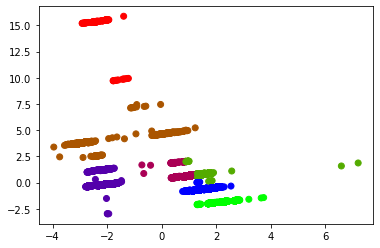

In [18]:
y_kmeans=kmeans.predict(X)

centroids=kmeans.cluster_centers_
#print(centroids)
#print(X[43388],X[43386],X[43389],X[77358])
#above are hshc 
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap='brg')

In [19]:
SSE = []
index = range(1,10)
for i in index:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
    print(kmeans.inertia_)

656516.6342885139
137809.75139138004
71687.40526786153
39125.9604087381
23643.550842145334
13393.454888685043
9903.135530091555
7727.0765320926275
5836.1581193208285


Text(0, 0.5, 'SEE')

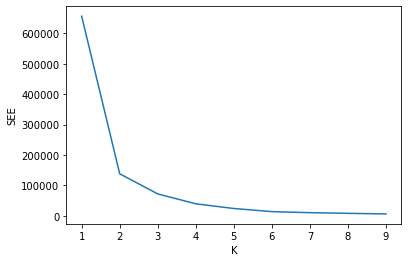

In [20]:
plt.plot(index, SSE)
plt.xlabel('K')
plt.ylabel('SEE')

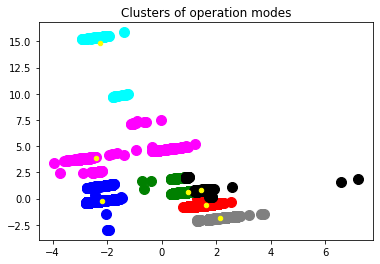

In [21]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.scatter(X[y_kmeans==5, 0], X[y_kmeans==5, 1], s=100, c='black', label ='Cluster 6')
plt.scatter(X[y_kmeans==6, 0], X[y_kmeans==6, 1], s=100, c='grey', label ='Cluster 7')
plt.scatter(centroids[:, 0], centroids[:, 1], s=20, c='yellow', label = 'Centroids')
plt.title('Clusters of operation modes')
#plt.scatter(X[50297][0], X[50297][1], s=50, c='brown', label ='Cluster 1')

plt.show()


In [22]:
centroids


array([[ 1.62268326, -0.60093036],
       [-2.18689986, -0.20404053],
       [ 0.96765485,  0.65231061],
       [-2.24804402, 14.83259245],
       [-2.39459547,  3.83291676],
       [ 1.44819316,  0.77452971],
       [ 2.13471268, -1.87156035]])

In [23]:
unique,count=np.unique(y_kmeans, return_counts=True)
print(np.asarray((unique, count)).T)

[[    0 38334]
 [    1 64273]
 [    2 33680]
 [    3   142]
 [    4  1292]
 [    5 24606]
 [    6  6370]]


In [24]:
reduced_data=pd.DataFrame(X, columns=['X','Y'])
reduced_data['cluster']=y_kmeans
cluster={}
cluster[0]=reduced_data[reduced_data.cluster==0].values
cluster[1]=reduced_data[reduced_data.cluster==1].values
cluster[2]=reduced_data[reduced_data.cluster==2].values
cluster[3]=reduced_data[reduced_data.cluster==3].values
cluster[4]=reduced_data[reduced_data.cluster==4].values
cluster[5]=reduced_data[reduced_data.cluster==5].values
cluster[6]=reduced_data[reduced_data.cluster==6].values




In [25]:
import math
def maxdistpoint(k,df):
    maxx=0
    #print(df)
    for i in range(len(df)):
        dist=math.sqrt(pow(centroids[k][0]-df[i][0],2)+pow(centroids[k][1]-df[i][1],2))
        maxx=max(maxx,dist)
        
    return maxx


In [26]:
radius=[]
for i in range(0,7):
    print("For centroid :",centroids[i])
    maxx=maxdistpoint(i,cluster[i])
    radius.append(maxx)
    print(maxx)
    
    




For centroid : [ 1.62268326 -0.60093036]
0.956755713796472
For centroid : [-2.18689986 -0.20404053]
2.788175733724247
For centroid : [0.96765485 0.65231061]
1.9856337828274166
For centroid : [-2.24804402 14.83259245]
5.140272242363142
For centroid : [-2.39459547  3.83291676]
4.318948685223693
For centroid : [1.44819316 0.77452971]
5.860486902197081
For centroid : [ 2.13471268 -1.87156035]
1.664042838513929


In [27]:
for i in range(0,7):
    print(radius[i])

0.956755713796472
2.788175733724247
1.9856337828274166
5.140272242363142
4.318948685223693
5.860486902197081
1.664042838513929


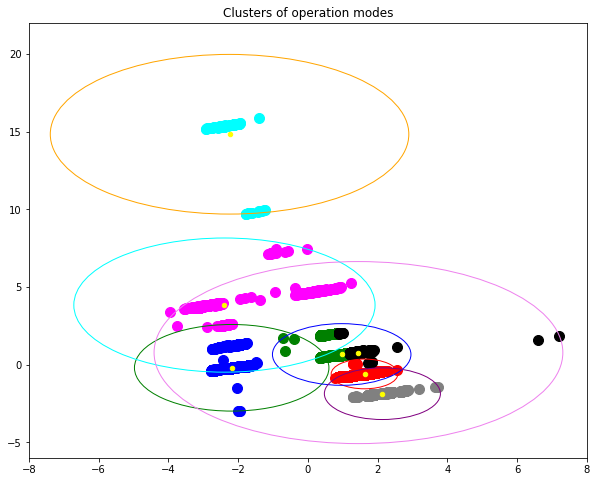

In [28]:
color=['red','green','blue', 'orange','cyan', 'violet', 'purple']
%matplotlib inline 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(10,8)
fig, ax = plt.subplots()
    
    


plt.xlim([-8,8])
plt.ylim([-6,22])
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.scatter(X[y_kmeans==5, 0], X[y_kmeans==5, 1], s=100, c='black', label ='Cluster 6')
plt.scatter(X[y_kmeans==6, 0], X[y_kmeans==6, 1], s=100, c='grey', label ='Cluster 7')
plt.scatter(centroids[:, 0], centroids[:, 1], s=20, c='yellow', label = 'Centroids')

for i in range(0,7):
    circle1 = plt.Circle((centroids[i][0], centroids[i][1]), radius[i] , color=color[i],fill= False)
    ax.add_artist(circle1)
plt.title('Clusters of operation modes')

#plt.scatter(X[50297][0], X[50297][1], s=50, c='brown', label ='Cluster 1')

plt.show()

In [29]:
import random
#print (random.randrange(14.5,100))
sensor1_test=[]
sensor2_test=[]
sensor3_test=[]
sensor4_test=[]
for i in range(0,40):
    sens1=random.randrange(0,10)
    sensor1_test.append(sens1)
    sens2=random.randrange(0,5)
    sensor2_test.append(sens2)
    sens3=random.randrange(531,1334)
    sensor3_test.append(sens3)
    sens4=random.randrange(-2,15)
    sensor4_test.append(sens4)
    
print(sensor1_test)
print(sensor2_test)
print(sensor3_test)
print(sensor4_test)

[3, 9, 3, 3, 0, 3, 0, 0, 6, 3, 2, 9, 2, 4, 7, 2, 1, 8, 0, 6, 9, 2, 6, 5, 9, 9, 7, 6, 9, 4, 3, 8, 0, 2, 3, 3, 2, 7, 2, 7]
[2, 3, 1, 4, 3, 2, 3, 3, 1, 4, 4, 4, 3, 4, 1, 1, 2, 1, 0, 1, 3, 0, 2, 4, 0, 2, 1, 1, 2, 2, 3, 0, 4, 1, 0, 0, 4, 2, 0, 1]
[806, 1327, 973, 1305, 995, 1079, 1160, 788, 1193, 1089, 614, 592, 628, 1217, 683, 866, 736, 682, 689, 720, 857, 832, 964, 926, 1201, 1199, 1041, 899, 1283, 721, 621, 1235, 910, 595, 728, 1074, 613, 617, 978, 1135]
[6, 1, 9, 12, 3, 1, 5, 5, 2, 12, 13, 7, 5, -1, 1, 10, 5, 14, 1, -1, 14, 13, 2, 9, 8, -2, 10, 5, 11, -2, 8, 13, 7, 11, 0, 10, 6, 5, 8, 5]


In [30]:
dataframe=pd.DataFrame({'sensor1':sensor1_test,'sensor2':sensor2_test,'sensor3':sensor3_test,"sensor4":sensor4_test})
dataframe

,sensor1,sensor2,sensor3,sensor4
0,3,2,806,6
1,9,3,1327,1
2,3,1,973,9
3,3,4,1305,12
4,0,3,995,3
5,3,2,1079,1
6,0,3,1160,5
7,0,3,788,5
8,6,1,1193,2
9,3,4,1089,12


In [31]:
print("hi")

hi


In [32]:
from sklearn.model_selection import train_test_split
r_hsn=h_s_n.values
X_h_s_n=h_s_n[['Sensor 1', 'Sensor 2', 'Sensor 3', 'Sensor 4']]
y_h_s_n=h_s_n['Label']
X_h_s_n.shape, y_h_s_n.shape
#h_s_n.describe()
#h_s_n.shape
X_hsn_train, X_hsn_test, y_hsn_train, y_hsn_test = train_test_split(X_h_s_n, y_h_s_n, train_size=0.7, random_state = 0)
X_hsn_train.shape

(71887, 4)

In [33]:
X_h_s_h_c=h_s_h_c[['Sensor 1', 'Sensor 2', 'Sensor 3', 'Sensor 4']]
y_h_s_h_c=h_s_h_c['Label']
X_h_s_h_c.shape, y_h_s_h_c.shape
X_hshc_train, X_hshc_test, y_hshc_train, y_hshc_test = train_test_split(X_h_s_h_c, y_h_s_h_c, train_size=0.7, random_state = 0)
X_hshc_train.head()

,Sensor 1,Sensor 2,Sensor 3,Sensor 4
43388,2.76,2.87,1260.0,12.0
43386,2.76,2.89,1260.0,13.0


In [34]:
X_l_s_h_v=l_s_h_v[['Sensor 1', 'Sensor 2', 'Sensor 3', 'Sensor 4']]
y_l_s_h_v=l_s_h_v['Label']
X_l_s_h_v.shape, y_l_s_h_v.shape
X_lshv_train, X_lshv_test, y_lshv_train, y_lshv_test = train_test_split(X_l_s_h_v, y_l_s_h_v, train_size=0.7, random_state = 0)
X_lshv_train.head()

,Sensor 1,Sensor 2,Sensor 3,Sensor 4
43317,3.50,3.63,605.0,10.0
48884,3.44,3.56,605.0,10.0
64027,3.79,3.66,605.0,9.0
62747,3.80,3.71,605.0,10.0
64037,3.81,3.74,605.0,10.0


In [35]:
X_l_s_n=l_s_n[['Sensor 1', 'Sensor 2', 'Sensor 3', 'Sensor 4']]
y_l_s_n=l_s_n['Label']
X_l_s_n.shape, y_l_s_n.shape
X_lsn_train, X_lsn_test, y_lsn_train, y_lsn_test = train_test_split(X_l_s_n, y_l_s_n, train_size=0.7, random_state = 0)

In [36]:
X_m_s_h_v=m_s_h_v[['Sensor 1', 'Sensor 2', 'Sensor 3', 'Sensor 4']]
y_m_s_h_v=m_s_h_v['Label']
X_m_s_h_v.shape, y_m_s_h_v.shape
X_mshv_train, X_mshv_test, y_mshv_train, y_mshv_test = train_test_split(X_m_s_h_v, y_m_s_h_v, train_size=0.7, random_state = 0)

In [37]:
X_m_s_n=m_s_n[['Sensor 1', 'Sensor 2', 'Sensor 3', 'Sensor 4']]
y_m_s_n=m_s_n['Label']
X_m_s_n.shape, y_m_s_n.shape
X_msn_train, X_msn_test, y_msn_train, y_msn_test = train_test_split(X_m_s_n, y_m_s_n, train_size=0.7, random_state = 0)

In [38]:
X_h_s_h_v=h_s_h_v[['Sensor 1', 'Sensor 2', 'Sensor 3', 'Sensor 4']]
y_h_s_h_v=h_s_h_v['Label']
X_h_s_h_v.shape

(2, 4)

In [39]:
#concatenated = pandas.concat([df1, df2]) 
#frames = [df1, df2, df3]
#result = pd.concat(frames)
X_train_frame=[X_hsn_train,X_hshc_train,X_lshv_train,X_lsn_train,X_mshv_train,X_msn_train, X_h_s_h_v] 
X_traint=pd.concat(X_train_frame, ignore_index=True)
#df = X_hsn_train.append(X_hshc_train)
X_traint.shape

(118086, 4)

In [40]:
y_train_frame=[y_hsn_train,y_hshc_train,y_lshv_train,y_lsn_train,y_mshv_train,y_msn_train, y_h_s_h_v] 
y_traint=pd.concat(y_train_frame, ignore_index=True)
y_traint.shape

(118086,)

In [41]:
X_test_frame=[X_hsn_test,X_hshc_test,X_lshv_test,X_lsn_test,X_mshv_test,X_msn_test,X_h_s_h_v] 
X_testt=pd.concat(X_test_frame, ignore_index=True)
X_testt.shape

(50613, 4)

In [42]:
y_test_frame=[y_hsn_test,y_hshc_test,y_lshv_test,y_lsn_test,y_mshv_test,y_msn_test,y_h_s_h_v] 
y_testt=pd.concat(y_test_frame, ignore_index=True)
y_testt.shape

(50613,)

# Label Encoding

In [43]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

# encoding train labels 
encoder.fit(y_traint)
y_train = encoder.transform(y_traint)

# encoding test labels 
encoder.fit(y_testt)
y_test = encoder.transform(y_testt)
print("after label encoding: ",y_test)
#Total Number of Continous and Categorical features in the training set
num_cols = X_traint._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)
#list(set(X_train.columns) - set(num_cols))


names_of_predictors = list(X_traint.columns.values)

# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_traint)
X_test_scaled = scaler.transform(X_testt)

after label encoding:  [2 2 2 ... 6 1 1]
Number of numeric features: 4


In [44]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
#from sklearn import svm
#from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Hyperparameter tuning using grid search and cross validation (cv=10)

In [45]:
#Libraries to Build Ensemble Model : Random Forest Classifier 
# Create the parameter grid based on the results of random search 
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-0, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [46]:
svm_model = GridSearchCV(SVC(), params_grid, cv=10)
svm_model.fit(X_train_scaled, y_train)

c:\users\shubham\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [1.0, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [47]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
y_pred = final_model.predict(X_test_scaled)
y_pred_label = list(encoder.inverse_transform(y_pred))

Best score for training data: 0.9999830623306233 

Best C: 1000 

Best Kernel: linear 

Best Gamma: scale 



In [48]:
# Making the Confusion Matrix
#print(pd.crosstab(Y_test_label, Y_pred_label, rownames=['Actual Activity'], colnames=['Predicted Activity']))
print(confusion_matrix(y_testt,y_pred_label))
print("\n")
print(classification_report(y_testt,y_pred_label))

print("Training set score for SVM: %f" % final_model.score(X_train_scaled , y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test_scaled  , y_test ))

svm_model.score

[[    2     0     0     0     0     0     0]
 [    0     2     0     0     0     0     0]
 [    0     0 30809     0     0     0     0]
 [    0     0     0    38     0     0     0]
 [    0     0     0     0    10     0     0]
 [    0     0     0     0     0     1     1]
 [    0     0     0     0     0     0 19750]]


                             precision    recall  f1-score   support

    High Speed High Current       1.00      1.00      1.00         2
  High Speed High Vibration       1.00      1.00      1.00         2
          High Speed Normal       1.00      1.00      1.00     30809
   Low Speed High Vibration       1.00      1.00      1.00        38
           Low Speed Normal       1.00      1.00      1.00        10
Medium Speed High Vibration       1.00      0.50      0.67         2
        Medium Speed Normal       1.00      1.00      1.00     19750

                   accuracy                           1.00     50613
                  macro avg       1.00      0.93      0.95 

<bound method BaseSearchCV.score of GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [1.0, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])>

# Implenting different SVM kernels 

In [49]:
from sklearn.metrics import accuracy_score
from sklearn import svm
#from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [50]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 0)
linear = svm.SVC(kernel='linear',C=1000).fit(X_train_scaled, y_train)

rbf = svm.SVC(kernel='rbf', gamma=0.001, C=1, decision_function_shape='ovr').fit(X_train_scaled, y_train)

poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovr').fit(X_train_scaled, y_train)

#sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [51]:
linear_pred = linear.predict(X_test_scaled)
poly_pred = poly.predict(X_test_scaled)
rbf_pred = rbf.predict(X_test_scaled)
linear_pred

array([2, 2, 2, ..., 6, 1, 1])

In [52]:
#linear_pred = linear.predict(X_test)
#poly_pred = poly.predict(X_test)
#rbf_pred = rbf.predict(X_test)
#sig_pred = sig.predict(X_test)
linear_pred_label = list(encoder.inverse_transform(linear_pred))
#print(linear_pred_label)
accuracy_lin = accuracy_score(y_testt,linear_pred_label)

poly_pred_label = list(encoder.inverse_transform(poly_pred))
accuracy_poly = accuracy_score(y_testt, poly_pred_label)

rbf_pred_label = list(encoder.inverse_transform(rbf_pred))
accuracy_rbf = accuracy_score(y_testt,rbf_pred_label)


#accuracy_sig = sig.score(X_test, y_test)

print("Accuracy Linear Kernel:", accuracy_lin)
print("Accuracy Polynomial Kernel:", accuracy_poly)
print("Accuracy Radial Basis Kernel:", accuracy_rbf)
#print("Accuracy Sigmoid Kernel:", accuracy_sig)

Accuracy Linear Kernel: 0.999980242230257
Accuracy Polynomial Kernel: 0.9999407266907712
Accuracy Radial Basis Kernel: 0.9980834963349338


In [53]:
from sklearn.metrics import confusion_matrix 
results_lin = confusion_matrix(y_test,linear_pred)
print("Confusion Martrix linear ",results_lin)
results_poly = confusion_matrix(y_test,poly_pred)
print("Confusion Martrix poly ",results_poly)
results = confusion_matrix(y_test,rbf_pred)
print("Confusion Martrix rbf",results)

Confusion Martrix linear  [[    2     0     0     0     0     0     0]
 [    0     2     0     0     0     0     0]
 [    0     0 30809     0     0     0     0]
 [    0     0     0    38     0     0     0]
 [    0     0     0     0    10     0     0]
 [    0     0     0     0     0     1     1]
 [    0     0     0     0     0     0 19750]]
Confusion Martrix poly  [[    1     0     1     0     0     0     0]
 [    0     2     0     0     0     0     0]
 [    0     0 30809     0     0     0     0]
 [    0     0     0    38     0     0     0]
 [    0     0     0     0    10     0     0]
 [    0     0     0     0     0     1     1]
 [    0     0     1     0     0     0 19749]]
Confusion Martrix rbf [[    0     0     2     0     0     0     0]
 [    0     0     2     0     0     0     0]
 [    0     0 30809     0     0     0     0]
 [    0     0     0    38     0     0     0]
 [    0     0     0     0     5     0     5]
 [    0     0     0     0     0     0     2]
 [    0     0    86     0 

In [54]:
from sklearn.metrics import classification_report 
print("linear report",classification_report(y_test, linear_pred)) 
print("poynomial kernel",classification_report(y_test, poly_pred)) 
print("RBF kernel report",classification_report(y_test, rbf_pred)) 

linear report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00     30809
           3       1.00      1.00      1.00        38
           4       1.00      1.00      1.00        10
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00     19750

    accuracy                           1.00     50613
   macro avg       1.00      0.93      0.95     50613
weighted avg       1.00      1.00      1.00     50613

poynomial kernel               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00     30809
           3       1.00      1.00      1.00        38
           4       1.00      1.00      1.00        10
           5       1.00      0.50      0.67    

c:\users\shubham\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Cross Validation ( k-fold )

In [55]:
from sklearn.model_selection import cross_val_score
X=pd.concat([X_traint,X_testt],ignore_index=True)
y=pd.concat([y_traint,y_testt],ignore_index=True)
score= cross_val_score(rbf,X,y,cv=10)
X.shape,y.shape

c:\users\shubham\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


((168699, 4), (168699,))

In [56]:
score

array([0.99988145, 0.99994072, 1.        , 1.        , 0.99994072,
       0.99994072, 0.99988145, 0.99982217, 0.99982217, 0.99988144])

In [57]:
score.mean()

0.9999110840630665

# Stratified k fold Validation

In [58]:
np.array(accuracy).mean()

NameError: name 'accuracy' is not defined